# Compute performance metrics for the given Y and Y_score without sklearn

## Imports 

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

## Defining Reusable Function

In [25]:
def confusion_matrix(y_array,y_pred_array):
    tp,tn,fp,fn = 0,0,0,0
    for y, y_pred in zip(y_array,y_pred_array):
        if y == y_pred:
            if y_pred == 1:
                tp += 1
            else:
                tn += 1
        else:
            if y_pred == 1:
                fp += 1
            else:
                fn += 1
    return [[tn,fn],[fp,tp]]

def precision_func(conf):
#   correctly predicted +ve points/ total predicted + ve points
    tp = conf[1][1]
    fp = conf[1][0]
    return tp / (tp + fp)

def recall_func(conf):
#   Correctly predicted +ve points / total positive points
    tp = conf[1][1]
    fn = conf[0][1]
    return tp / (fn+tp)    

def f1_score(precision,recall):
    return 2* ( (precision * recall) / (precision + recall) )

def accuracy(conf):
    correct = conf[1][1] + conf[0][0]
    total = sum(conf[0]) + sum(conf[1])
    return correct / total


import matplotlib.pyplot as plt
%matplotlib inline
def auc_score(y,proba):
    tau = 0
    tpr =[]
    fpr = []
    for ele in proba:
        y_pred = np.where(proba >= ele ,1,0)
        conf = confusion_matrix(y,y_pred)
        tpr.append(conf[1][1] / (conf[1][1] + conf[0][1]))
        fpr.append(conf[1][0] / (conf[1][0] + conf[0][0]))
    
    fig,axes = plt.subplots(nrows=1,ncols=1)
    axes.plot(np.array(fpr),np.array(tpr))
    axes.set_xlabel('FPR')
    axes.set_ylabel('TPR')
    axes.set_title('AUC Score')
    return np.trapz( np.array(tpr),np.array(fpr))

# Solving the assignment

## A

### Question

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> 
   
   y_pred =  [0  if y_score < 0.5 else  1]

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

### Solution

In [26]:
# write your code here
df = pd.read_csv('/home/parth/AppliedAI/assignments/7 Compute Performance metrics without Sklearn/5_a.csv')
df['y_pred'] = df['proba'].apply(lambda x: 1 if x > 0.5 else 0)
df.sort_values(by=['proba'],ascending=False,inplace=True)
df.head().transpose()

,1664,2099,1028,9592,8324
y,1.000000,1.000000,1.000000,1.000000,1.000000
proba,0.899965,0.899828,0.899825,0.899812,0.899768
y_pred,1.000000,1.000000,1.000000,1.000000,1.000000


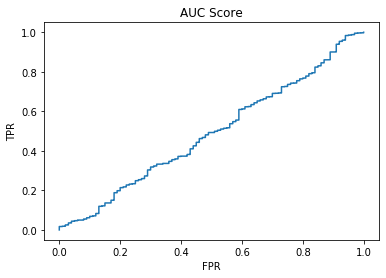

In [27]:
conf = confusion_matrix(df['y'].values , df['y_pred'].values)
pre = precision_func(conf)
rec = recall_func(conf)
f1 = f1_score(pre,rec)
acc = accuracy(conf)
auc = auc_score(df['y'].values,df['proba'].values)

In [28]:
print('Confusion Matrix \n',conf)
print('\nPrecision\n',pre)
print('\nRecall\n',rec)
print('\nF1 Score\n',f1)
print('\nAccuracy \n', acc)
print('\nAuc Score \n',auc)

Confusion Matrix 
 [[0, 0], [100, 10000]]

Precision
 0.9900990099009901

Recall
 1.0

F1 Score
 0.9950248756218906

Accuracy 
 0.9900990099009901

Auc Score 
 0.48829900000000004


## B

### Question

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> 
      y_pred =  [0  if y_score < 0.5 else  1]

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

### Solution

In [29]:
df = pd.read_csv('/home/parth/AppliedAI/assignments/7 Compute Performance metrics without Sklearn/5_b.csv')
df['y_pred'] = df['proba'].apply(lambda x: 1 if x > 0.5 else 0)
df.sort_values(by=['proba'],ascending=False,inplace=True)
df.head().transpose()

,8446,1978,1657,110,8578
y,1.000000,1.000000,1.000000,1.000000,1.000000
proba,0.595294,0.594808,0.592198,0.590171,0.588718
y_pred,1.000000,1.000000,1.000000,1.000000,1.000000


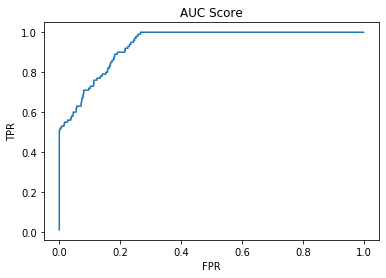

In [30]:
# write your code
conf = confusion_matrix(df['y'].values,df['y_pred'].values)

f1 = f1_score(precision_func(conf),recall_func(conf))

auc = auc_score(df['y'].values,df['proba'].values)

acc = accuracy(conf)

In [31]:
print('Confsion Matrix')
print(conf)
print('F1 Score')
print(f1)
print('Auc Score')
print(auc)
print('Accuracy')
print(acc)

Confsion Matrix
[[9761, 45], [239, 55]]
F1 Score
0.2791878172588833
Auc Score
0.9377570000000001
Accuracy
0.9718811881188119


## C

### Question

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: 
   y_pred =  [0  if y_score < 0.5 else  1]

  A = 500 x number of false negative + 100 x number of false positive

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

### Solution

In [9]:
df = pd.read_csv('/home/parth/AppliedAI/assignments/7 Compute Performance metrics without Sklearn/5_c.csv')
df['y_pred'] = df['prob'].apply(lambda x: 1 if x > 0.5 else 0)
df.sort_values(by=['prob'],ascending=False,inplace=True)
df.reset_index(inplace=True)
df.head().transpose()

,0,1,2,3,4
index,2634.000000,2548.000000,2447.000000,2788.000000,2456.000000
y,1.000000,1.000000,1.000000,1.000000,1.000000
prob,0.957747,0.951437,0.948638,0.944094,0.941113
y_pred,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
 # write your code
def auc_score_conf(y,proba):
    tau = 0
    conf = []
    for ele in proba:
        y_pred = np.where(proba >= ele ,1,0)
        conf.append(confusion_matrix(y,y_pred))
    return conf

conf_list = auc_score_conf(df['y'].values,df['prob'].values)

In [11]:
A = []
for conf in conf_list:
    A.append((500 * conf[0][1]) + (100 * conf[1][0]) )
x = np.array(A)
print('Lowest Value of A')
print(x.min())
print('The threshold value is')
print(df['prob'].loc[x.argmin()])

Lowest Value of A
141000
The threshold value is
0.2300390278970873


## D

### Question

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

### Solution

In [12]:
df = pd.read_csv('/home/parth/AppliedAI/assignments/7 Compute Performance metrics without Sklearn/5_d.csv')
df.head().transpose()

,0,1,2,3,4
y,101.0,120.0,131.0,164.0,154.0
pred,100.0,100.0,113.0,125.0,152.0


In [13]:
# Mean Square Error
def mse(y,pred):
    return sum(((y -pred )**2))/len(y)

# MAPE
def mape(y,pred):
    return sum(np.absolute(y-pred))/sum(y)

# R Squared
def r_squared(y,pred):
    mean = np.mean(y)
    ss_t = sum((y-mean)**2)
    ss_r = sum((y-pred)**2)
    return 1- ((ss_r)/(ss_t))


In [14]:
print('Mean Square Error')
print(mse(df['y'].values,df['pred'].values))

print('MAPE')
print(mape(df['y'].values,df['pred'].values))

print('R Squared')
print(r_squared(df['y'].values,df['pred'].values))

Mean Square Error
177.16569974554707
MAPE
0.1291202994009687
R Squared
0.9563582786990964
